1. Análise Exploratória

• Valor total vendido e Valor total da meta por ano?

• Crie um gráfico de linhas para exibir o comportamento das vendas ao
longo do ano de 2021.

• Quantos clientes ativos e inativos temos em nossa empresa?

• Qual a linha de produtos mais vendida?

• Qual foi a quantidade total de produtos vendidos por ano?

• Qual foi o total de peso em toneladas dos produtos vendidos em todo o
período?

• Comparando a performance por gerente, qual dos gerentes teve o maior
faturamento? Qual o percentual relativo a esse faturamento?

• Qual equipe teve a melhor performance de vendas?

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Vendas')

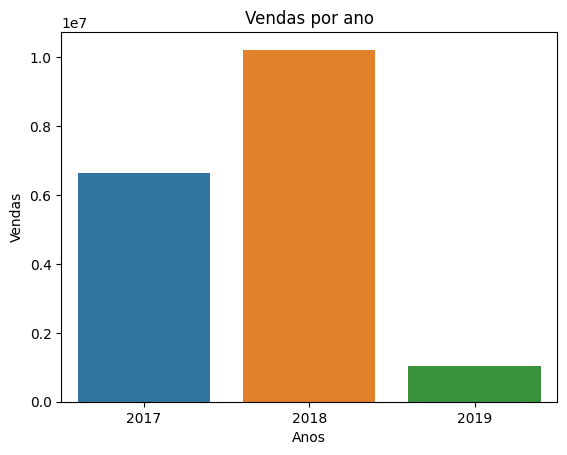

In [16]:
import pandas as pd                     # LER E MANIPULAR ARQUIVOS DISTINTOS
import os                               # GERENCIAR O SISTEMA OPERACIONAL
import matplotlib.pyplot as plt         # VISUALIZAR DADOS DE FORMA GRÁFICA
import seaborn as sns                   # VISUALIZAR DADOS DE FORMA GRÁFICA

######################## CARREGAR OS ARQUIVOS DE VENDAS ###############################


# PASTA QUE CONTÉM TODOS OS ARQUIVOS
caminhoDaPasta = './arquivo/vendas/'

######## AGRUPAR TODOS OS DOCUMENTOS EM UM ÚNICO DATAFRAME ############

diretorios = []         # Lista Vazia

# LOCALIZAR OS ARQUIVOS E COMBINAR COM O CAMINHO DA PASTA
for file in os.listdir(caminhoDaPasta):
    fullPath = caminhoDaPasta + file
    diretorios.append(fullPath)
    
# CRIAR UM DATAFRAME VAZIO
dfVendas = pd.DataFrame()

# LOOP PARA ACESSAR OS DOCUMENTOS E COMBINÁ-LOS (+/- UNION DO SQL)
# ELE COMBINA APENAS OS ARQUIVO COM EXTENSÃO .XLSX

for path in diretorios:
    if path.endswith('.xlsx'):
        df = pd.read_excel(path)
        dfVendas = pd.concat([dfVendas,df])
    
# GERAR UM ARQUIVO CSV COM OS DADOS CONSOLIDADOS
dfVendas.to_csv(caminhoDaPasta + 'arquivoCombinado.csv')



######################## CARREGAR OS DEMAIS DATAFRAMES ###################################

dfMetas = pd.read_excel('./arquivo/base-meta-new.xlsx')
dfVendedores = pd.read_excel('./arquivo/Dimensões.xlsx',sheet_name='Vendedor')
dfProdutos = pd.read_excel('./arquivo/Dimensões.xlsx',sheet_name='Produto')
dfDatas = pd.read_excel('./arquivo/Dimensões.xlsx',sheet_name='Data')
dfGrupoProduto = pd.read_excel('./arquivo/Dimensões.xlsx',sheet_name='GrupoProduto')
dfClientes = pd.read_excel('./arquivo/Dimensões.xlsx',sheet_name='Cliente')

################# TRATAMENTO DO DATAFRAME METAS ############################

# FATIAMENTO DO DATAFRAME
dfMetas = dfMetas.iloc[3:,1:4]

# RENOMEAR COLUNAS
dfMetas.columns = ['cdVendedor','data','meta']

dfMetas

# MESCLANDO AS TABELAS VENDAS E DATAS COM PD.MERGE

df_result = pd.merge(
                dfVendas[['DataEmissao','QtdItens','ValorUnitario']],
                dfDatas[['Data','Ano']],
                left_on='DataEmissao',
                right_on='Data'
            )

# ADICIONAR A COLUNA SUBTOTAL AO DATAFRAME
df_result['subtotal'] = df_result['QtdItens'] * df_result['ValorUnitario']

# AGRUPAR OS DADOS POR ANO
df_result = df_result[['Ano','subtotal']].groupby('Ano').sum().reset_index()

# CRIAR O GRÁFICO
sns.barplot(
    data=df_result,
    x = 'Ano',
    y = 'subtotal')

plt.title('Vendas por ano')
plt.xlabel('Anos')
plt.ylabel('Vendas')

In [17]:
dfGrupoProduto.head(1)

,cdGrupo,Grupo,Linha
0,102,Leite em Pó,Alimentos


In [19]:
dfProdutos.head(1)

,cdProduto,Descrição,cdGrupo
0,1,Produto 1,9999


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Linha', ylabel='QtdItens'>

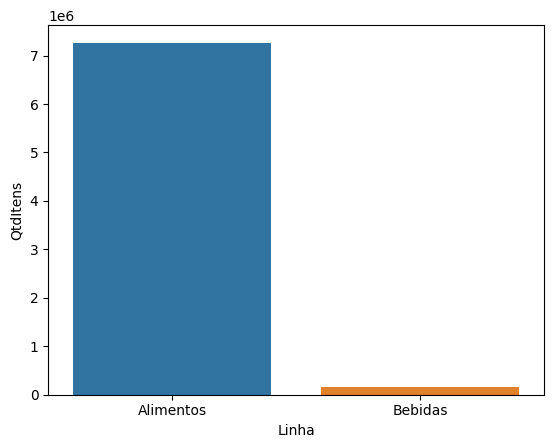

In [34]:
dfGrupo = pd.merge(
                   dfProdutos, 
                   dfGrupoProduto,
                   left_on='cdGrupo',
                   right_on='cdGrupo'
)

df_result = pd.merge(
                   dfVendas[['cdProduto','QtdItens']],
                   dfGrupo[['cdProduto','Linha']],
                   left_on='cdProduto',
                   right_on='cdProduto'
)

df_result = df_result[['Linha', 'QtdItens']].groupby('Linha').sum().reset_index()


sns.barplot(
    data=df_result,
    x = 'Linha',
    y = 'QtdItens')

